In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('/project/project_462000451/enchanted-surrogates/submodules/static_sparse_grid_approximations')

sys.path.append('/project/project_462000451/enchanted-surrogates/submodules/tokamak_samplers')

# The profiles that leppin gave me don't match Frazenetties fit for the same time

see test_rho_profiles in DEEPlasma for the code to make the plots

leppin t = 48.8 to 49.9  
frazinetti t = 49.2

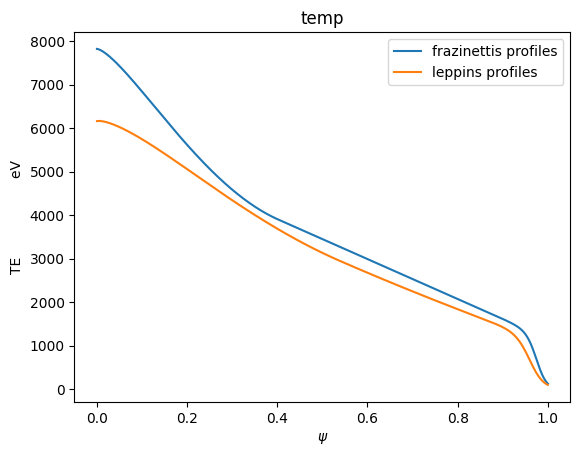

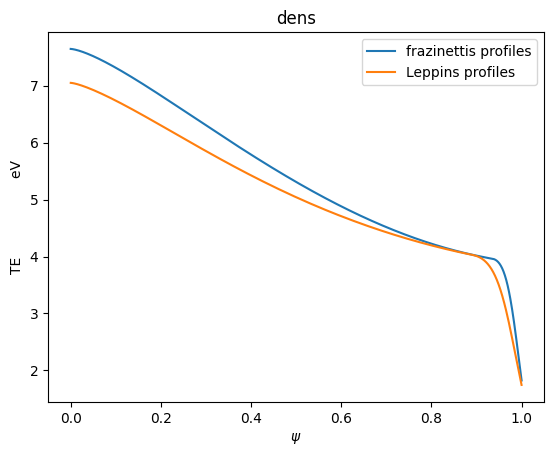

core temp eV 7820.927384825203  
core density E19 7.646352839916924  
B_T from GENE 3.281  
core beta 0.07345331557103357  

# ByPass Enchanted Surrogates, 

## Sample Pedestal Helena Parameters, Static Sparse Grid

ne_sep: separatrix density  
ne ped: density pedestal height  
delta n: density pedestal width  
te ped: temperature pedestal height  
delta Te: temperature pedestal width  

In [1]:
import os, sys
sys.path.append('/project/project_462000451/enchanted-surrogates/submodules/static_sparse_grid_approximations')
sys.path.append('/project/project_462000451/enchanted-surrogates/src')
from samplers.static_sparse_grid import StaticSparseGrid

parameters = ['T_eped', 'n_eped', 'd_n_ped', 'd_T_ped', 'n_esep']
ssg_kargs = {
    'bounds': [[1,3], [3,5], [0.001, 0.1], [0.001,0.1], [0.5,2.5]],
    'level': 3,
    'parameters': parameters
    }

ssg = StaticSparseGrid(**ssg_kargs)

Cannot find bmdal_reg. Please point to those in your bash script if you intend to use ActiveLearnerBMDAL No module named 'bmdal_reg'
Cannot find DREAM. Please add the $DREAMPATH/py to your PYTHONPATH environment variable before running. No module named 'DREAM'
POINTS SHAPE (21, 5)
 no points for dim = 5 and level = 3 is n = 21


## Make Helena Directories and Run them in a loop. 

In [8]:
from parsers.HELENAparser import HELENAparser
import sys, os
hp = HELENAparser()

base_run_dir = '/scratch/project_462000451/daniel/sprint_out/helena/level_3/'
sbatch_path = '/scratch/project_462000451/gene_out/helena_daniel_out/submit.cmd'
namelist_path = "/project/project_462000451/jet_97781_data/97781_T029_fort.10"
for sample in ssg.samples:
    # hp.write_input_file_noKBM(self, params: dict, run_dir: str, namelist_path: str)
    run_dir_name = '-'.join([str(s) for s in sample])
    run_dir_path = os.path.join(base_run_dir, run_dir_name)
    os.system(f'mkdir {run_dir_path} -p')
    os.system(f'cd {run_dir_path} && cp {sbatch_path} ./')
    params = {p: s for p, s in zip(parameters, sample)}
    hp.write_input_file_noKBM(params, run_dir_path, namelist_path)
    os.system(f'cd {run_dir_path} && sbatch submit.cmd')

Writing to /scratch/project_462000451/daniel/sprint_out/helena/level_3/2.0-4.0-0.0505-0.0505-1.5. Params (europed): {'T_eped': 2.0, 'n_eped': 4.0, 'd_n_ped': 0.0505, 'd_T_ped': 0.0505, 'n_esep': 1.5}
neped=4.0, nesep=1.5, teped=2.0, tesep=0.1
fort.10 written to: /scratch/project_462000451/daniel/sprint_out/helena/level_3/2.0-4.0-0.0505-0.0505-1.5/fort.10
Submitted batch job 9455033
Writing to /scratch/project_462000451/daniel/sprint_out/helena/level_3/3.0-4.0-0.0505-0.0505-1.5. Params (europed): {'T_eped': 3.0, 'n_eped': 4.0, 'd_n_ped': 0.0505, 'd_T_ped': 0.0505, 'n_esep': 1.5}
neped=4.0, nesep=1.5, teped=3.0, tesep=0.1
fort.10 written to: /scratch/project_462000451/daniel/sprint_out/helena/level_3/3.0-4.0-0.0505-0.0505-1.5/fort.10
Submitted batch job 9455034
Writing to /scratch/project_462000451/daniel/sprint_out/helena/level_3/2.0-5.0-0.0505-0.0505-1.5. Params (europed): {'T_eped': 2.0, 'n_eped': 5.0, 'd_n_ped': 0.0505, 'd_T_ped': 0.0505, 'n_esep': 1.5}
neped=5.0, nesep=1.5, teped=2.

# Run Enchanted surrogates, Not woking

In [1]:
import os
os.chdir('/project/project_462000451/enchanted-surrogates/')
os.system('bash run_lumi.bash')

The following modules were not unloaded:
  (Use "module --force purge" to unload all):

  1) ModuleLabel/label   2) lumi-tools/24.05   3) init-lumi/0.2

The following sticky modules could not be reloaded:

  1) lumi-tools


helena_config_beta_noKBM_lumi.yaml
Cannot find bmdal_reg. Please point to those in your bash script if you intend to use ActiveLearnerBMDAL No module named 'bmdal_reg'
Cannot find DREAM. Please add the $DREAMPATH/py to your PYTHONPATH environment variable before running. No module named 'DREAM'
POINTS SHAPE (21, 5)
 no points for dim = 5 and level = 3 is n = 21
Starting Setup
Making directory of simulations at: /scratch/project_462000451/daniel/sprint_out/helena, and copying /pfs/lustrep4/projappl/project_462000451/enchanted-surrogates/configs/helena_config_beta_noKBM_lumi.yaml to CONFIG.yaml
Beginning SLURMCluster Generation
Initializing DASK clients
Finished Setup
Creating initial runs
Generating Samples:
Making Dask Futures
Sampler is SEQUENTIAL
single_code_run: /scratch/project_462000451/daniel/sprint_out/helena/4a025eef-5d72-4dd5-8222-d265bdda7cf6
single_code_run: /scratch/project_462000451/daniel/sprint_out/helena/3aa18b80-8315-4d1b-9191-1938808b818e
single_code_run: /scratch/pro

Traceback (most recent call last):
  File "/pfs/lustrep4/projappl/project_462000451/enchanted-surrogates/src/run.py", line 53, in <module>
    main(args)
  File "/pfs/lustrep4/projappl/project_462000451/enchanted-surrogates/src/run.py", line 38, in main
    executor.start_runs()
  File "/pfs/lustrep4/projappl/project_462000451/enchanted-surrogates/src/executors/DaskExecutor.py", line 127, in start_runs
    res = future.result()
          ^^^^^^^^^^^^^^^
  File "/project/project_462000451/enchanted_container_lumi3/lib/python3.11/site-packages/distributed/client.py", line 401, in result
    return self.client.sync(self._result, callback_timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/pfs/lustrep4/projappl/project_462000451/enchanted-surrogates/src/executors/base.py", line 49, in run_simulation_task
    runner_output = runner.single_code_run(params_from_sampler, run_dir)
      ^^^^^^^^^^^^^^^^^
  File "/pfs/lustrep4/projappl/project_462000451/

256